<img src="images/MLP.png">

In [13]:
import numpy as np
import math

class MLP():
    def __init__(self, lr, e, neurons):
        """Constructor"""
        # Learning rate
        self.lr = lr
        
        # Tolerance
        self.e = e
        
        # Number of neurons per layer
        self.neurons = neurons
        
    def sigmoid(self, valor):
        """Calculate the sigmoid of a value"""
        return 1 / (1 + math.e**(-valor))
    
    def sigmoid_deriv(self, valor):
        """Calculate the derivative of the sigmoid function.  Usado na retropropagação."""
        sig = self.sigmoid(valor)
        return sig * (1 - sig)

    def activate(self, valor):
        """Activate the neuron's outputs"""
        return self.sigmoid(valor)
    
    def deriv(self, valor):
        """Calculate the derivative of the activation function"""
        return self.sigmoid_deriv(valor)

    def evaluate(self, target, predicted):
        """Calculate the difference between the real and predicted values"""
        return target - predicted

    def predict(self, input_data, weights):
        """Calculate the weighted sum of inputs and weights"""
        return np.dot(input_data, weights).reshape(1, -1)


In [14]:
def train(self, x, d):
    """Train the MLP model"""
    # Initialize weights randomly
    self.w1 = np.random.random((x.shape[1] + 1, self.neurons[0]))
    self.w2 = np.random.random((self.neurons[0], self.neurons[1]))
    self.w3 = np.random.random((self.neurons[1], self.neurons[2]))

    epoch = 0
    last_mse = np.inf
    self.total_mse = []
    self.bias = -1
    
    while True:
        mse = 0
        for xi, target in zip(x, d):
            # Forward pass
            input_value = np.insert(xi, 0, self.bias)
            i1 = self.predict(input_value, self.w1)
            y1 = self.activate(i1)
            i2 = self.predict(y1, self.w2)
            y2 = self.activate(i2)
            i3 = self.predict(y2, self.w3)
            y3 = self.activate(i3)
            
            # Calculate error
            current_error = self.evaluate(target, y3)
            mse += (current_error ** 2)
            
            # Backward pass (Backpropagation)
            delta3 = current_error * self.deriv(i3)
            self.w3 += self.lr * np.dot(y2.T, delta3)

            delta2 = np.dot(delta3, self.w3.T) * self.deriv(i2)
            self.w2 += self.lr * np.dot(y1.T, delta2)

            delta1 = np.dot(delta2, self.w2.T) * self.deriv(i1)
            self.w1 += self.lr * np.dot(input_value.reshape(1, -1).T, delta1)
        
        mse = mse / len(x)
        
        print(f"EPOCH: {epoch} - MSE: {mse} - |mse_ant - mse|: {abs(last_mse - mse)}")
        if abs(last_mse - mse) <= self.e:
            break
        
        self.total_mse.append(mse)
        last_mse = mse
        epoch += 1

MLP.train = train

In [15]:
def test(self, x):
    """Given a list of X, submit them to the network"""
    results = []
    for xi in x:
        input_value = np.insert(xi, 0, self.bias)
        i1 = self.predict(input_value, self.w1)
        y1 = self.activate(i1)
        i2 = self.predict(y1, self.w2)
        y2 = self.activate(i2)
        i3 = self.predict(y2, self.w3)
        y3 = self.activate(i3)
        
        results.append(int(np.rint(y3[0][0])))  # Ensure extracting a single element
    
    return results

MLP.test = test

In [16]:
import numpy as np

# Generate features
num_samples = 100
num_features = 5
X1 = np.random.normal(0, 1, size=(num_samples, num_features))
X2 = np.random.normal(2, 1, size=(num_samples, num_features))

# Combine features
X = np.concatenate([X1, X2], axis=0)

# Generate target variable
y1 = np.zeros(num_samples)  # Class 0
y2 = np.ones(num_samples)   # Class 1
y = np.concatenate([y1, y2])

# Shuffle data
idx = np.random.permutation(len(X))
X = X[idx]
y = y[idx]

# Initialize and train the MLP
mlp = MLP(lr=0.1, e=0.00001, neurons=[5, 4, 1])
mlp.train(X, y)

# Test the MLP
predictions = mlp.test(X)
print(f"Predictions: {predictions}")



EPOCH: 0 - MSE: [[0.28241246]] - |mse_ant - mse|: [[inf]]
EPOCH: 1 - MSE: [[0.2503769]] - |mse_ant - mse|: [[0.03203557]]
EPOCH: 2 - MSE: [[0.2502614]] - |mse_ant - mse|: [[0.0001155]]
EPOCH: 3 - MSE: [[0.24991543]] - |mse_ant - mse|: [[0.00034597]]
EPOCH: 4 - MSE: [[0.24954824]] - |mse_ant - mse|: [[0.00036719]]
EPOCH: 5 - MSE: [[0.24915698]] - |mse_ant - mse|: [[0.00039126]]
EPOCH: 6 - MSE: [[0.24872946]] - |mse_ant - mse|: [[0.00042752]]
EPOCH: 7 - MSE: [[0.24825438]] - |mse_ant - mse|: [[0.00047508]]
EPOCH: 8 - MSE: [[0.24772103]] - |mse_ant - mse|: [[0.00053335]]
EPOCH: 9 - MSE: [[0.2471189]] - |mse_ant - mse|: [[0.00060212]]
EPOCH: 10 - MSE: [[0.24643752]] - |mse_ant - mse|: [[0.00068138]]
EPOCH: 11 - MSE: [[0.24566629]] - |mse_ant - mse|: [[0.00077123]]
EPOCH: 12 - MSE: [[0.24479449]] - |mse_ant - mse|: [[0.0008718]]
EPOCH: 13 - MSE: [[0.24381118]] - |mse_ant - mse|: [[0.00098331]]
EPOCH: 14 - MSE: [[0.24270515]] - |mse_ant - mse|: [[0.00110603]]
EPOCH: 15 - MSE: [[0.24146474]] 

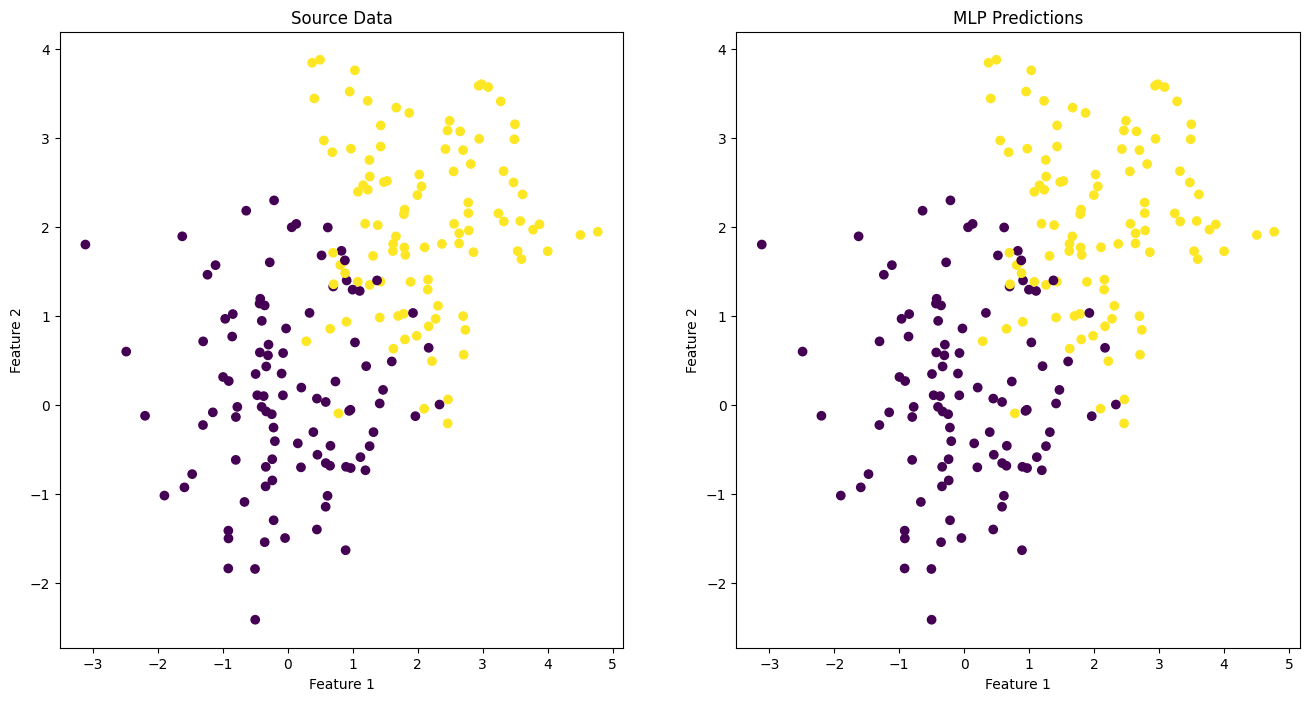

In [17]:
# Part 5: Plot the Source Data and Results

import matplotlib.pyplot as plt
# Plot the source data (for simplicity, plotting only the first two features)
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.title('Source Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot the results (for simplicity, plotting only the first two features)
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=predictions, cmap='viridis')
plt.title('MLP Predictions')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()


Test Accuracy: 0.9675


Text(0, 0.5, 'Feature 2')

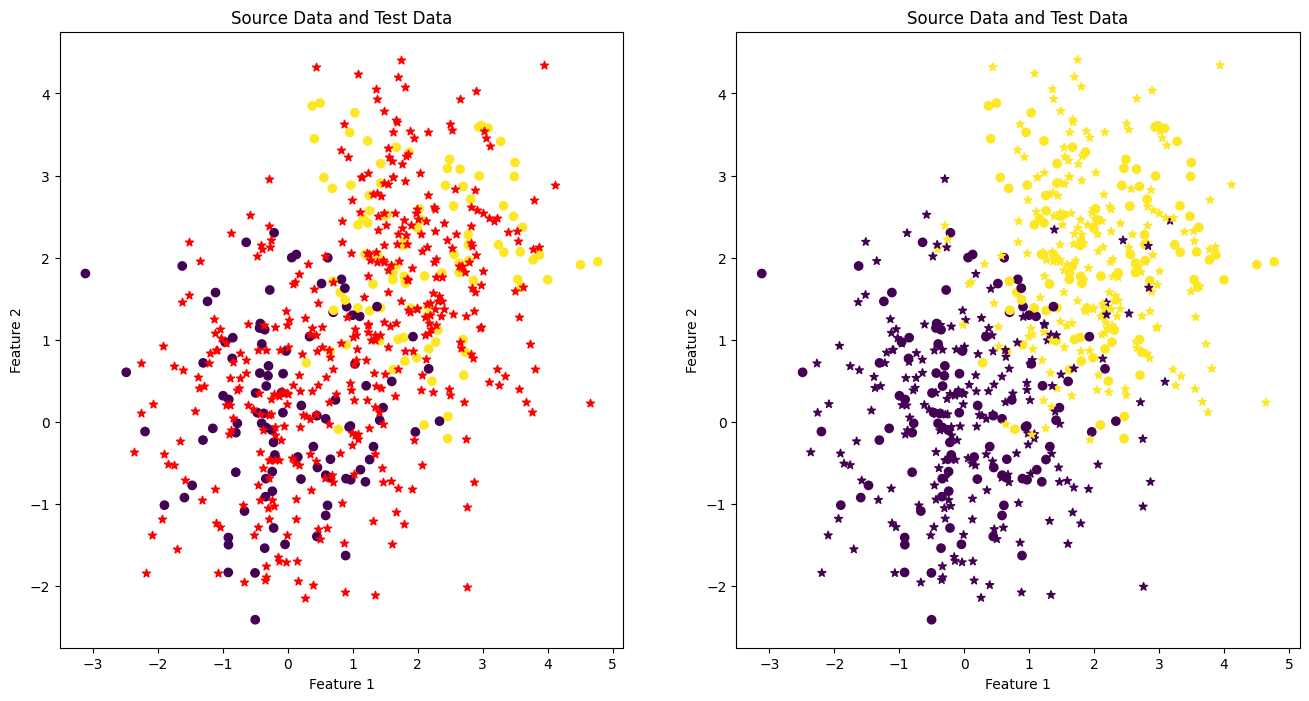

In [18]:
num_test_samples = 200
X_test1 = np.random.normal(0, 1, size=(num_test_samples, num_features))
X_test2 = np.random.normal(2, 1, size=(num_test_samples, num_features))

# Combine features for test data
X_test = np.concatenate([X_test1, X_test2], axis=0)

# Generate test target variable
y_test1 = np.zeros(num_test_samples)  # Class 0
y_test2 = np.ones(num_test_samples)   # Class 1
y_test = np.concatenate([y_test1, y_test2])

# Shuffle test data
idx_test = np.random.permutation(len(X_test))
X_test = X_test[idx_test]
y_test = y_test[idx_test]

predictions = mlp.test(X_test)
accuracy = np.mean(predictions == y_test)

print(f"Test Accuracy: {accuracy}")

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c='red', marker = "*")
plt.title('Source Data and Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions, cmap='viridis', marker = "*")
plt.title('Source Data and Test Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')